<a href="https://colab.research.google.com/github/mramasu/StatisticsProject/blob/main/Final%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Introduction***

 This project targets for total Medical bill in different regions of USA based on 6 attributes: age, sex, BMi, number of children, smoking and region.

# ***`Data Set Information:`***


X::  INPUT VARIABLES

1. age: age of primary beneficiary

2. sex: insurance contractor gender(female/ male)

3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

4. children: Number of children covered by health insurance / Number of dependents

5. smoker: Smoking (Yes/No)

6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.


Y::  OUTPUT VARIABLES

* charges: Individual medical costs billed by health insurance




# ***Required Libraries***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split 

from sklearn.metrics import f1_score
from scipy.stats import skew
from sklearn.utils import shuffle
import pylab as pl
%matplotlib inline

# Techniques Applied

This data set was applied for Descriptive Statistics , data visualization, and regression modelling techniques.

However, I explored the data set with other multiple supervised and unsupervised learning techniques, also. 

At end of every technique, I analyzed the efficiency of the model, with performance metrics of the statistical inference.


In [6]:
Ins_df = pd.read_csv('insurance.csv')
Ins_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Reviewing the data

1. For null values

In [7]:
Ins_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

2. For values as data types of every column, 

In [8]:
Ins_df.info()
Ins_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


I analyzed that Sex, Smoker, and Region columns can be transformed into categorical data types for ease of use in future.


So I made a copy of dataframe to compare the categorical numeric given in response to each value.

In [9]:
Ins_df1 = Ins_df.copy()
#We want the Ins_df in numbers, therefore we will replace the yes/no in smoker coloumn by 1/0, male/female as 0/1 and regions 
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(Ins_df1.sex.drop_duplicates()) 
Ins_df1.sex = le.transform(Ins_df1.sex)
# smoker or not
le.fit(Ins_df1.smoker.drop_duplicates()) 
Ins_df1.smoker = le.transform(Ins_df1.smoker)
#region
le.fit(Ins_df1.region.drop_duplicates()) 
Ins_df1.region = le.transform(Ins_df1.region)


In this we can see the categorical values against the labels in original data.

In [10]:
pd.DataFrame({'Actual_Gender':Ins_df.sex.drop_duplicates(), 'categorical_Gender':Ins_df1.sex.drop_duplicates(),'Actual_smoker':Ins_df.smoker.drop_duplicates(), 'categorical_smoker':Ins_df1.smoker.drop_duplicates(),'Actual_Region':Ins_df.region.drop_duplicates(), 'categorical_Region':Ins_df1.region.drop_duplicates()})

,Actual_Gender,categorical_Gender,Actual_smoker,categorical_smoker,Actual_Region,categorical_Region
0,female,0.0,yes,1.0,southwest,3
1,male,1.0,no,0.0,southeast,2
3,NaN,NaN,NaN,NaN,northwest,1
8,NaN,NaN,NaN,NaN,northeast,0


# **Data Distribution Observation by Descriptive Statistics and Data Visualization**

Then for observing the quartiles, this function of .describe() was very useful also.

In [11]:
Ins_df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# BOX Plot of each variable.

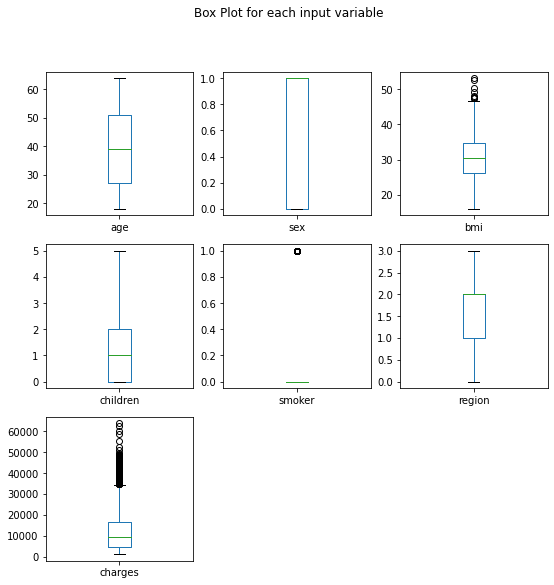

In [12]:
Ins_df1.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each input variable')
plt.savefig('boxplot')
plt.show()

# Histogram Plots for Each variable
 to determine the distribution visually especially if it is normally distributed or not

<Figure size 1080x720 with 0 Axes>

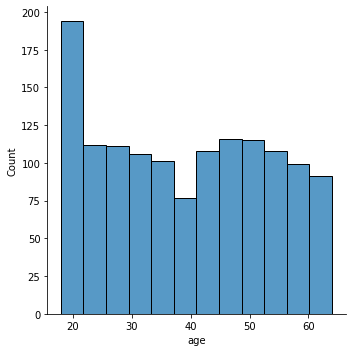

In [13]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.displot(Ins_df1['age'])
plt.show()

**AGE**

<Figure size 1080x720 with 0 Axes>

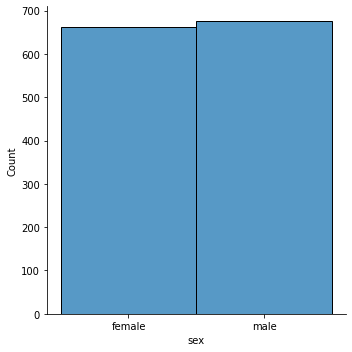

In [14]:
plt.figure(figsize=(15,10))

sns.displot(Ins_df['sex'])
plt.show()

**SEX**

<Figure size 1080x720 with 0 Axes>

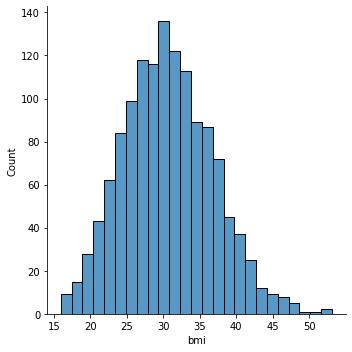

In [15]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.displot(Ins_df1['bmi'])
plt.show()

**BMi**

BMI is the only one showing normal distribution.

<Figure size 1080x720 with 0 Axes>

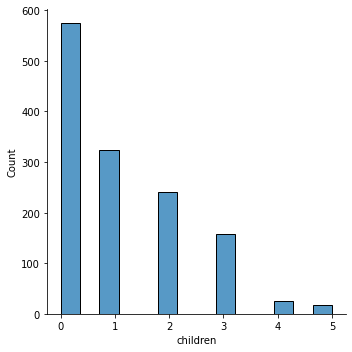

In [16]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.displot(Ins_df1['children'])
plt.show()

**Children**

<Figure size 1080x720 with 0 Axes>

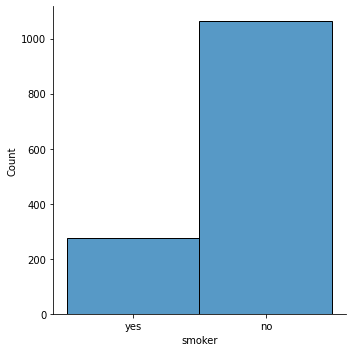

In [17]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.displot(Ins_df['smoker'])
plt.show()

**Smoker**

<Figure size 1080x720 with 0 Axes>

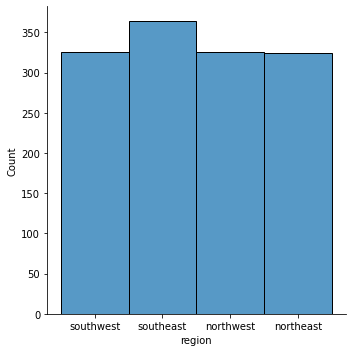

In [18]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.displot(Ins_df['region'])
plt.show()

**Region**

<Figure size 1080x720 with 0 Axes>

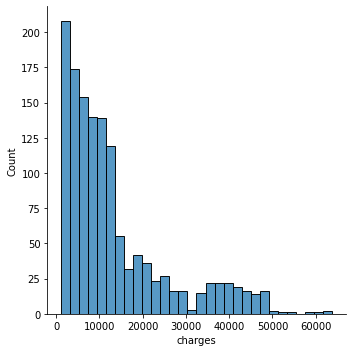

In [19]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.displot(Ins_df1['charges'])
plt.show()

**Charges**

---
# **Scatter Plots**

to understand the relationship between input variables and output variables.

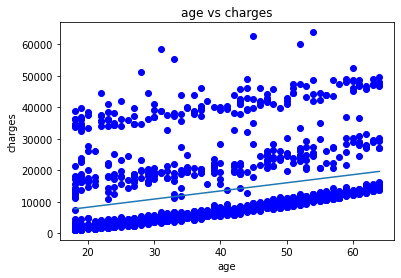

In [20]:
plt.scatter(Ins_df1.age, Ins_df1.charges, color='blue')
plt.title('age vs charges')  
plt.xlabel('age') 
plt.ylabel('charges')
plt.plot(np.unique(Ins_df1.age), np.poly1d(np.polyfit(Ins_df1.age, Ins_df1.charges, 1))(np.unique(Ins_df1.age)))
plt.show()

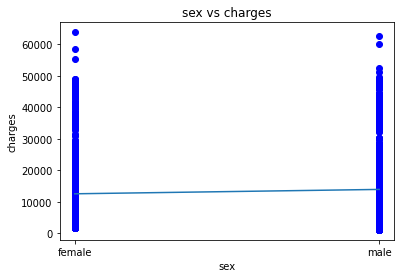

In [21]:
plt.scatter(Ins_df.sex, Ins_df.charges, color='blue')
plt.title('sex vs charges')  
plt.xlabel('sex') 
plt.ylabel('charges')
plt.plot(np.unique(Ins_df1.sex), np.poly1d(np.polyfit(Ins_df1.sex, Ins_df1.charges, 1))(np.unique(Ins_df1.sex)))
plt.show()

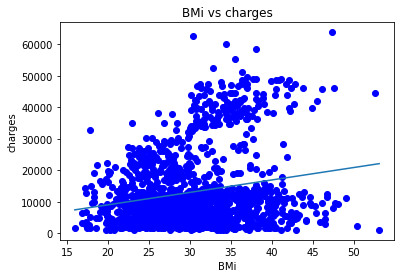

In [22]:
plt.scatter(Ins_df1.bmi, Ins_df1.charges, color='blue')
plt.title('BMi vs charges')  
plt.xlabel('BMi') 
plt.ylabel('charges')
plt.plot(np.unique(Ins_df1.bmi), np.poly1d(np.polyfit(Ins_df1.bmi, Ins_df1.charges, 1))(np.unique(Ins_df1.bmi)))
plt.show()

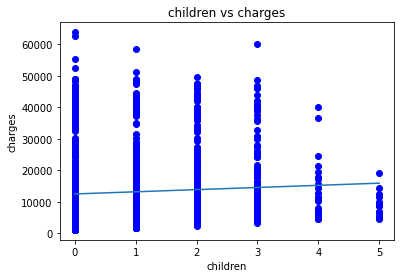

In [23]:
plt.scatter(Ins_df1.children, Ins_df1.charges, color='blue')
plt.title('children vs charges')  
plt.xlabel('children') 
plt.ylabel('charges')
plt.plot(np.unique(Ins_df1.children), np.poly1d(np.polyfit(Ins_df1.children, Ins_df1.charges, 1))(np.unique(Ins_df1.children)))
plt.show()

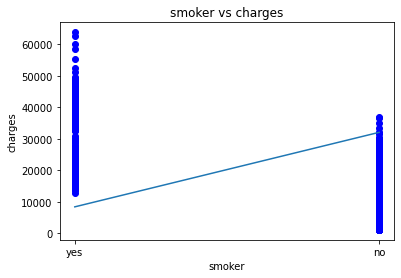

In [24]:
plt.scatter(Ins_df.smoker, Ins_df.charges, color='blue')
plt.title('smoker vs charges')  
plt.xlabel('smoker') 
plt.ylabel('charges')
plt.plot(np.unique(Ins_df1.smoker), np.poly1d(np.polyfit(Ins_df1.smoker, Ins_df1.charges, 1))(np.unique(Ins_df1.smoker)))
plt.show()

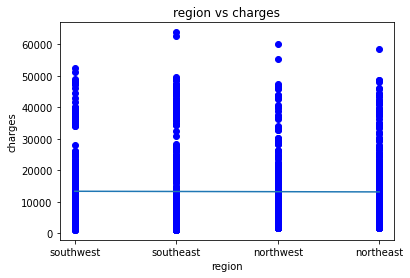

In [25]:
plt.scatter(Ins_df.region, Ins_df.charges, color='blue')
plt.title('region vs charges')  
plt.xlabel('region') 
plt.ylabel('charges')
plt.plot(np.unique(Ins_df1.region), np.poly1d(np.polyfit(Ins_df1.region, Ins_df1.charges, 1))(np.unique(Ins_df1.region)))
plt.show()



---


# **Correlation Matrix**

I reviewed correlations between all variables using a heatmap.

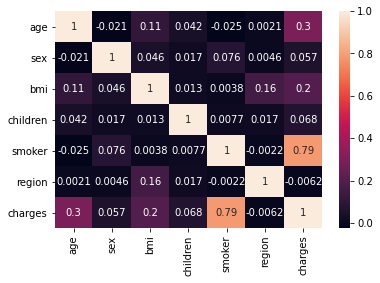

In [26]:
corr = Ins_df1.corr()  # get correlation matrix
sns.heatmap(corr,vmax=1,annot=True)    # plot correlation matrix

# **For Pearson and Spearman Correlations**, 

I calculated them individually. with every variable

In [27]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [28]:
# calculate Pearson's correlation
corr= pearsonr(Ins_df1['age'], Ins_df1['charges'])
print('Pearsons correlation for age:', corr)
# calculate spearman's correlation
corr = spearmanr(Ins_df1['age'], Ins_df1['charges'])
print('Spearmans correlation for age :', corr)

Pearsons correlation for age: (0.2990081933306476, 4.8866933317203816e-29)
Spearmans correlation for age : SpearmanrResult(correlation=0.5343921337718459, pvalue=1.130692027803638e-99)


In [29]:
# calculate Pearson's correlation
corr= pearsonr(Ins_df1['sex'], Ins_df1['charges'])
print('Pearsons correlation for sex:', corr)
# calculate spearman's correlation
corr = spearmanr(Ins_df1['sex'], Ins_df1['charges'])
print('Spearmans correlation for sex:', corr)

Pearsons correlation for sex: (0.057292062202025366, 0.03613272100594507)
Spearmans correlation for sex: SpearmanrResult(correlation=0.009489705930109288, pvalue=0.728738333936428)


In [30]:
# calculate Pearson's correlation
corr= pearsonr(Ins_df1['bmi'], Ins_df1['charges'])
print('Pearsons correlation for bmi:', corr)
# calculate spearman's correlation
corr = spearmanr(Ins_df1['bmi'], Ins_df1['charges'])
print('Spearmans correlation for bmi:', corr)

Pearsons correlation for bmi: (0.1983409688336288, 2.459085535117846e-13)
Spearmans correlation for bmi: SpearmanrResult(correlation=0.11939590358331145, pvalue=1.1926059544526874e-05)


In [31]:
# calculate Pearson's correlation
corr= pearsonr(Ins_df1['children'], Ins_df1['charges'])
print('Pearsons correlation for children:', corr)
# calculate spearman's correlation
corr = spearmanr(Ins_df1['children'], Ins_df1['charges'])
print('Spearmans correlation for children:', corr)

Pearsons correlation for children: (0.0679982268479048, 0.012852128520141125)
Spearmans correlation for children: SpearmanrResult(correlation=0.13333894319168216, pvalue=9.846806132997295e-07)


In [32]:
# calculate Pearson's correlation
corr= pearsonr(Ins_df1['smoker'], Ins_df1['charges'])
print('Pearsons correlation for smoker:', corr)
# calculate spearman's correlation
corr = spearmanr(Ins_df1['smoker'], Ins_df1['charges'])
print('Spearmans correlation for smoker:', corr)

Pearsons correlation for smoker: (0.7872514304984775, 8.271435842176839e-283)
Spearmans correlation for smoker: SpearmanrResult(correlation=0.6634600597131323, pvalue=1.6347637541775159e-170)


In [33]:
# calculate Pearson's correlation
corr= pearsonr(Ins_df1['region'], Ins_df1['charges'])
print('Pearsons correlation for region:', corr)
# calculate spearman's correlation
corr = spearmanr(Ins_df1['region'], Ins_df1['charges'])
print('Spearmans correlation for region:', corr)

Pearsons correlation for region: (-0.006208234909444456, 0.8205178364655592)
Spearmans correlation for region: SpearmanrResult(correlation=-0.043530622014392666, pvalue=0.11148382473345786)


---

# **RANDOM SAMPLING**

A technique appplied for sampling method of data in statistics. As the data was having a problem with equal division,hence the stratified method couldn't be imposed with different output and input variables. So I applied diffent sampling methods on dataset as whole. It is useful for clustering techniques later.

In [35]:
# Obtain simple random sample
simple_random_sample = Ins_df1.sample(n=4).sort_values(by='charges')

# Save the sample mean in a separate variable
simple_random_mean = round(simple_random_sample['charges'].mean(),3)

# View sampled data frame
print(simple_random_sample)
print("simple_random_mean=",simple_random_mean)

      age  sex     bmi  children  smoker  region      charges
1273   35    1  27.610         1       0       2   4747.05290
60     43    1  27.360         3       0       0   8606.21740
605    51    0  34.100         0       0       2   9283.56200
724    50    0  27.075         1       0       0  10106.13425
simple_random_mean= 8185.742


# **SYSTEMATIC SAMPLING**





In [36]:
# Define systematic sampling function
def systematic_sampling(Ins_df1, step):
    
    indexes = np.arange(0,len(Ins_df1),step=step)
    systematic_sample = Ins_df1.iloc[indexes]
    return systematic_sample
    
# Obtain a systematic sample and save it in a new variable
systematic_sample = systematic_sampling(Ins_df1, 300)

# Save the sample mean in a separate variable
systematic_mean = round(systematic_sample['charges'].mean(),300)
# View sampled data frame
print(systematic_sample)
print("systematic_random_mean=",systematic_mean)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
300    36    1  27.550         3       0       0   6746.74250
600    18    0  39.160         0       0       2   1633.04440
900    49    1  22.515         0       0       0   8688.85885
1200   37    1  24.320         2       0       1   6198.75180
systematic_random_mean= 8030.4643099999985


# **SIMPLE LINEAR REGRESSION**
with all statistical inferences as taught in class.

In [238]:
#ordinary least squares (OLS)
import statsmodels.api as sm
from statsmodels.formula.api import ols
shuffled_data = shuffle(Ins_df1)
y=shuffled_data.charges
x=shuffled_data.bmi
ols_results = sm.OLS(y, x).fit()
print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.564
Model:                            OLS   Adj. R-squared (uncentered):              0.563
Method:                 Least Squares   F-statistic:                              1726.
Date:                Fri, 18 Jun 2021   Prob (F-statistic):                   6.10e-243
Time:                        15:00:31   Log-Likelihood:                         -14451.
No. Observations:                1338   AIC:                                  2.890e+04
Df Residuals:                    1337   BIC:                                  2.891e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [37]:
#ordinary least squares (OLS) of bmi with exponential
import statsmodels.api as sm
from statsmodels.formula.api import ols
shuffled_data = shuffle(Ins_df1)
y=np.log(shuffled_data.charges.values.reshape(-1,1))
x=shuffled_data.bmi
ols_results = sm.OLS(y, x).fit()
print(ols_results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                          3.001e+04
Date:                Fri, 18 Jun 2021   Prob (F-statistic):                        0.00
Time:                        18:28:46   Log-Likelihood:                         -2749.4
No. Observations:                1338   AIC:                                      5501.
Df Residuals:                    1337   BIC:                                      5506.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# **RANDOM SAMPLING For Multiple Regression **** **
 
 FOR All Input variables using shuffle, and all variables as input.

In [38]:
from sklearn.model_selection import train_test_split
shuffled_data = shuffle(Ins_df1)
y=shuffled_data.charges
x=shuffled_data.drop(['charges'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 0)

In [39]:
ols_results = sm.OLS(y, x).fit()
print(ols_results.summary())
#ordinary least squares (OLS)

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1537.
Date:                Fri, 18 Jun 2021   Prob (F-statistic):                        0.00
Time:                        18:29:45   Log-Likelihood:                         -13621.
No. Observations:                1338   AIC:                                  2.725e+04
Df Residuals:                    1332   BIC:                                  2.729e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Coefficients: [  253.24668909  -387.08108354   324.28240162   370.97964247
 23886.36037307  -263.71894704] 
 Intercept:  -11310.436211558217


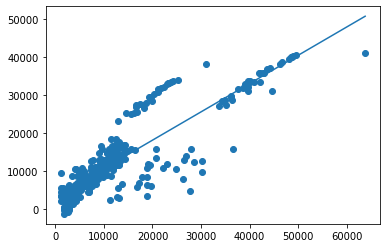

mean absolute error = 3999.827469182722
mean squared error = 33303592.80705489
R² = 0.7519802420765256


,Actual,Predict
1302,3208.78700,1345.627771
921,13462.52000,14365.877405
1267,34254.05335,28340.596423


In [40]:
from sklearn.linear_model import LinearRegression as lm
lm_model = lm().fit(x_train, y_train)
y_pred=lm_model.predict(x_test)
print('Coefficients:', lm_model.coef_, '\n Intercept: ', lm_model.intercept_)
plt.scatter(y_test,y_pred)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)))
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("mean absolute error =",mean_absolute_error(y_test, y_pred))
print("mean squared error =",mean_squared_error(y_test, y_pred))
print("R² =",r2_score(y_test, y_pred))
pd.DataFrame({'Actual':y_test, 'Predict': y_pred}).head(3)

#  Dataset WITH EXPONENTIAL TRANSFORMATION

In [41]:
x_train = x_train.values
x_test = x_test.values
# Output or Predicted Value of data
y_train = np.log(y_train.values.reshape(-1,1))
y_test = np.log(y_test.values.reshape(-1,1))

#LINEAR REGRESSION WITH EXPONENTIAL TRANSFORMATION

Coefficients: [[ 0.03439866 -0.08829255  0.01203187  0.09644583  1.5520347  -0.04019744]] 
 Intercept:  [7.05841243]


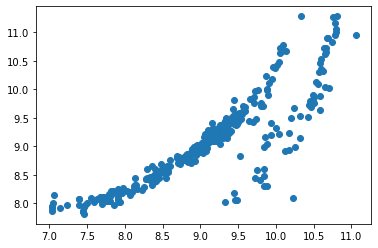

mean absolute error = 0.26779153692386976
mean squared error = 0.18964689833162068
R² = 0.7615207985249118


In [42]:

from sklearn.linear_model import LinearRegression as lm
lm_model = lm().fit(x_train, y_train)
y_pred=lm_model.predict(x_test)
print('Coefficients:', lm_model.coef_, '\n Intercept: ', lm_model.intercept_)
plt.scatter(y_test,y_pred)
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("mean absolute error =",mean_absolute_error(y_test, y_pred))
print("mean squared error =",mean_squared_error(y_test, y_pred))
print("R² =",r2_score(y_test, y_pred))

#RIDGE REGRESSION WITH EXPONENTIAL TRANSFORMATION

Coefficients: [[ 0.03439657 -0.08752766  0.01202517  0.0963684   1.54284794 -0.04020115]] 
 Intercept:  [7.06036454]


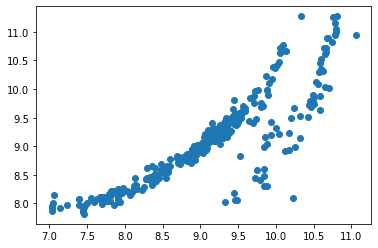

mean absolute error = 0.26798966670079655
mean squared error = 0.18963067597744188
R² = 0.7615411979836146


In [43]:
from sklearn.linear_model import Ridge

Ridge_model = Ridge(alpha=1.0).fit(x_train, y_train)
y_pred = Ridge_model.predict(x_test)
print('Coefficients:', Ridge_model.coef_, '\n Intercept: ', Ridge_model.intercept_)
plt.scatter(y_test,y_pred)
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("mean absolute error =",mean_absolute_error(y_test, y_pred))
print("mean squared error =",mean_squared_error(y_test, y_pred))
print("R² =",r2_score(y_test, y_pred))

# LASSO REGRESSION WITH EXPONENTIAL TRANSFORMATION

Coefficients: [ 0.03429005 -0.          0.00773294  0.02670798  0.9528176  -0.        ] 
 Intercept:  [7.2926558]


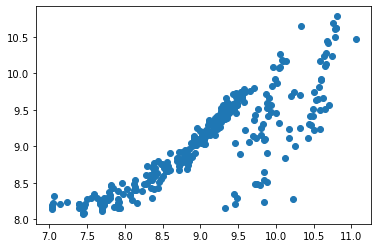

mean absolute error = 0.35400317506372836
mean squared error = 0.2563091370801263
R²error = 0.6776936565830147


In [44]:
from sklearn import linear_model
Lasso_model = linear_model.Lasso(alpha=0.1).fit(x_train, y_train)
y_pred = Lasso_model.predict(x_test)
print('Coefficients:', Lasso_model.coef_, '\n Intercept: ', Lasso_model.intercept_)
plt.scatter(y_test,y_pred)
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("mean absolute error =",mean_absolute_error(y_test, y_pred))
print("mean squared error =",mean_squared_error(y_test, y_pred))
print("R²error =",r2_score(y_test, y_pred))


In [45]:
ols_results = sm.OLS(y_train, x_train).fit()
print(ols_results.summary())
#ordinary least squares (OLS) WITH EXPONENTIAL TRANSFORMATION

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              8268.
Date:                Fri, 18 Jun 2021   Prob (F-statistic):                        0.00
Time:                        18:31:18   Log-Likelihood:                         -1674.1
No. Observations:                1003   AIC:                                      3360.
Df Residuals:                     997   BIC:                                      3390.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# ***Conclusion for Linear Regression Models***
1. The "BMI vs. charges" gave best results because bmi has normal distribution and mean can be relied upon..
2. Transformation into exponential gave better R-squared due to Scatter-Plot shows relationship estimate as exponential.


---


---



---

# **Buckets is created and added as column into because charges is continous Variable**





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


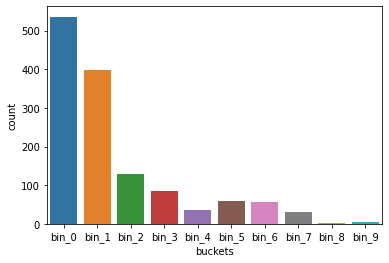

In [46]:
bin_labels_5 = ['bin_0','bin_1', 'bin_2', 'bin_3', 'bin_4', 'bin_5', 'bin_6', 'bin_7', 'bin_8', 'bin_9']
Ins_df1['buckets'] = pd.cut(Ins_df1['charges'], bins=10, labels=bin_labels_5, precision=0)
import seaborn as sns
sns.countplot(Ins_df1['buckets'],label="Count")
plt.show()


In [47]:
Ins_df1.head()

,age,sex,bmi,children,smoker,region,charges,buckets
0,19,0,27.900,0,1,3,16884.92400,bin_2
1,18,1,33.770,1,0,2,1725.55230,bin_0
2,28,1,33.000,3,0,2,4449.46200,bin_0
3,33,1,22.705,0,0,1,21984.47061,bin_3
4,32,1,28.880,0,0,1,3866.85520,bin_0


# **LOGISTIC REGRESSION BETWEEN **

***Smoker vs buckets***

All performance metrics and CONFUSION MATRIX was added at end also.

F1 score= 0.1153003721424774
Precision score= 0.4955223880597015
Recall Score= 0.4955223880597015
[[150   0   0   0   0   0   0   0   0   0]
 [ 85   0   0   0   0   0   0   0   0   0]
 [ 17   0  16   0   0   0   0   0   0   0]
 [  7   0  10   0   0   0   0   0   0   0]
 [  8   0   4   0   0   0   0   0   0   0]
 [  1   0  11   0   0   0   0   0   0   0]
 [  0   0  15   0   0   0   0   0   0   0]
 [  0   0   9   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   2   0   0   0   0   0   0   0]]


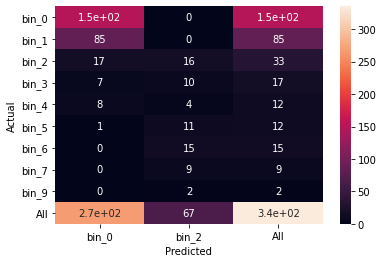

In [49]:
shuffled_data = shuffle(Ins_df1)
y=shuffled_data.buckets
x=shuffled_data[['smoker']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("F1 score=",f1_score(y_test, y_pred, average="macro"))
print("Precision score=",precision_score(y_test, y_pred, average="micro"))
print("Recall Score=",recall_score(y_test, y_pred, average="micro"))

from sklearn.metrics import plot_confusion_matrix
q= confusion_matrix(y_test, y_pred, labels=['bin_0','bin_1', 'bin_2', 'bin_3', 'bin_4', 'bin_5', 'bin_6', 'bin_7', 'bin_8', 'bin_9'])
print(q)
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()



# **Sex vs. buckets**



F1 score= 0.0634920634920635
Precision score= 0.4
Recall Score= 0.4
[[134   0   0   0   0   0   0   0   0   0]
 [ 95   0   0   0   0   0   0   0   0   0]
 [ 34   0   0   0   0   0   0   0   0   0]
 [ 28   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0   0   0]
 [ 14   0   0   0   0   0   0   0   0   0]
 [ 15   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0]]


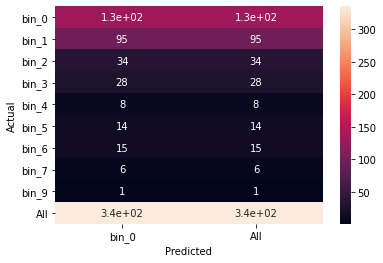

In [247]:
shuffled_data = shuffle(Ins_df1)
y=shuffled_data.buckets
x=shuffled_data[['sex']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("F1 score=",f1_score(y_test, y_pred, average="macro"))
print("Precision score=",precision_score(y_test, y_pred, average="micro"))
print("Recall Score=",recall_score(y_test, y_pred, average="micro"))
from sklearn.metrics import plot_confusion_matrix
q= confusion_matrix(y_test, y_pred, labels=['bin_0','bin_1', 'bin_2', 'bin_3', 'bin_4', 'bin_5', 'bin_6', 'bin_7', 'bin_8', 'bin_9'])
print(q)
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

# **Region vs. Buckets**

F1 score= 0.06073752711496746
Precision score= 0.3761194029850746
Recall Score= 0.3761194029850746
[[126   0   0   0   0   0   0   0   0   0]
 [102   0   0   0   0   0   0   0   0   0]
 [ 34   0   0   0   0   0   0   0   0   0]
 [ 26   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0   0   0]
 [ 22   0   0   0   0   0   0   0   0   0]
 [ 10   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


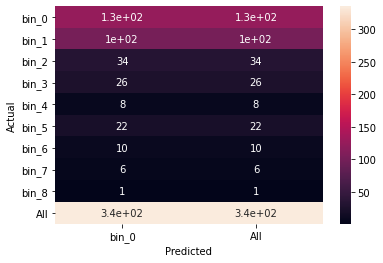

In [249]:
shuffled_data = shuffle(Ins_df1)
y=shuffled_data.buckets
x=shuffled_data[['region']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("F1 score=",f1_score(y_test, y_pred, average="macro"))
print("Precision score=",precision_score(y_test, y_pred, average="micro"))
print("Recall Score=",recall_score(y_test, y_pred, average="micro"))

from sklearn.metrics import plot_confusion_matrix
q= confusion_matrix(y_test, y_pred, labels=['bin_0','bin_1', 'bin_2', 'bin_3', 'bin_4', 'bin_5', 'bin_6', 'bin_7', 'bin_8', 'bin_9'])
print(q)
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

# **All Variables as inputs are used for Logistic Regression**

F1 score= 0.4549369399603601
Precision score= 0.7313432835820896
Recall Score= 0.7313432835820896
 Accuracy  0.7313432835820896
[[130   8   0   0   0   0   0   0   0   0]
 [  4  88   0   1   0   0   0   0   0   0]
 [  4  11   0   9   0  15   0   0   0   0]
 [  4   5   0   7   0   2   0   0   0   0]
 [  3   3   0   3   0   0   0   0   0   0]
 [  0   0   0   1   0  10   1   0   0   0]
 [  0   0   4   3   0   4   7   0   0   0]
 [  0   0   4   1   0   0   0   3   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


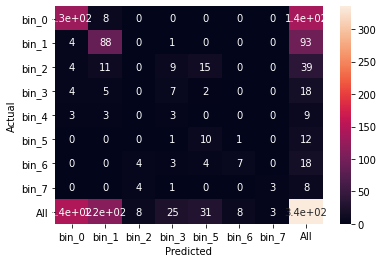

In [250]:
shuffled_data = shuffle(Ins_df1)
y=shuffled_data.buckets
x=shuffled_data.drop(['charges','buckets'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 0)

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("F1 score=",f1_score(y_test, y_pred, average="macro"))
print("Precision score=",precision_score(y_test, y_pred, average="micro"))
print("Recall Score=",recall_score(y_test, y_pred, average="micro"))
print(' Accuracy ' , accuracy_score(y_test , y_pred))

from sklearn.metrics import plot_confusion_matrix
q = confusion_matrix(y_test, y_pred, labels=['bin_0','bin_1', 'bin_2', 'bin_3', 'bin_4', 'bin_5', 'bin_6', 'bin_7', 'bin_8', 'bin_9'])
print(q)

import seaborn as sn

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()


# ***Conclusion***
The input variables as whole give better model with more better and varied predictions of all bins.


---



---



---



# CLUSTERING **TECHNIQUES**

***Some Scatterplots with distinctions of another categorical variables were used to see if clustering was possible.***

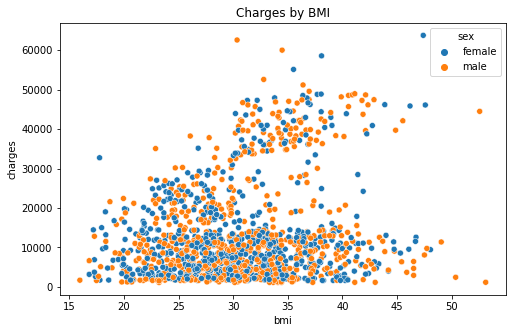

In [264]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=Ins_df, x="bmi", y="charges", hue="sex")
plt.title('Charges by BMI');
plt.show();

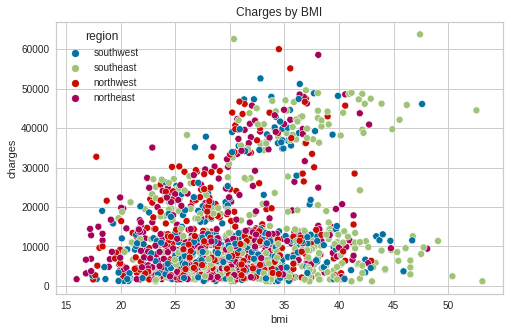

In [51]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=Ins_df, x="bmi", y="charges", hue="region")
plt.title('Charges by BMI');
plt.show();

# **Kmeans Clustering**

Applied upon BMi vs. charges, after analyzing the best number of clusters with ELBOW METHOD...

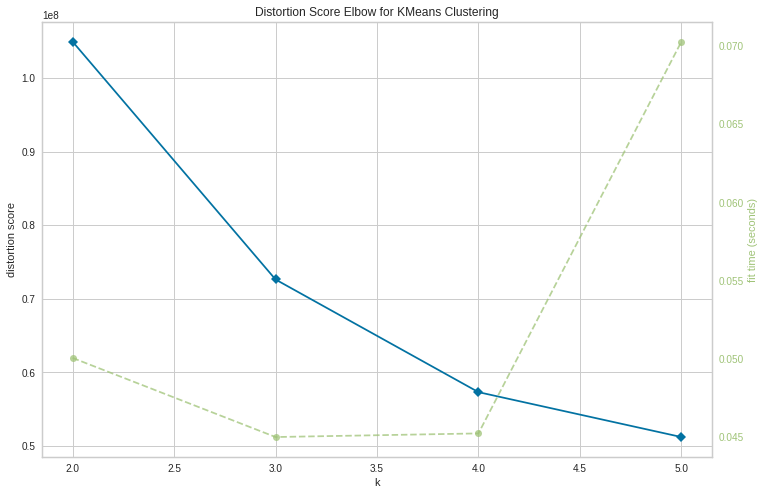

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipyker

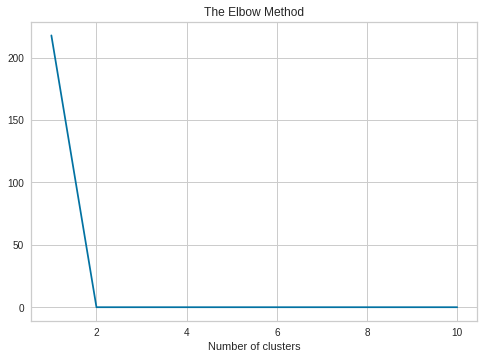

In [57]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from sklearn.metrics import pairwise_distances

fig = plt.figure(figsize=(12,8))
X = Ins_df1[["bmi", "charges"]]

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6))
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()  

from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia);
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.show();

[[3.04948512e+01 6.56611357e+03]
 [2.87227737e+01 1.95182035e+04]
 [3.50239172e+01 4.10979122e+04]]
[1 0 0 ... 0 0 1]


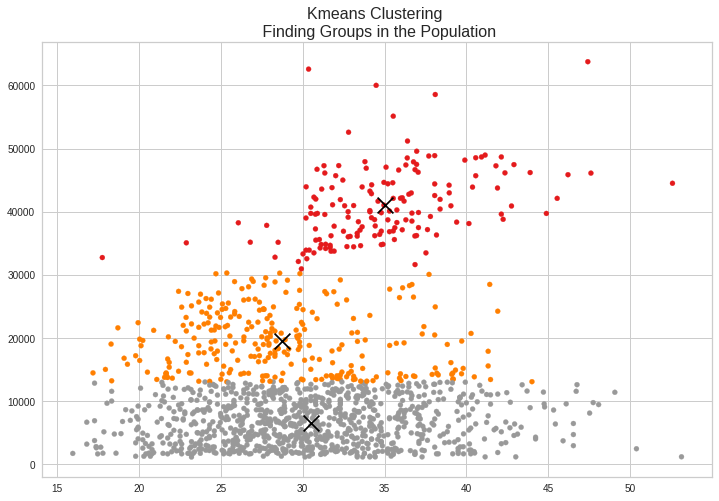

In [52]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

fig = plt.figure(figsize=(12,8))
plt.scatter(X.values[:,0], X.values[:,1] , c=kmeans.labels_ , cmap="Set1_r", s=25)

plt.title("Kmeans Clustering \n Finding Groups in the Population", fontsize=16)

plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.show()

**I reduce the number of cluster to 2 to compare with smokers distinction**

[[3.02174386e+01 8.36484755e+03]
 [3.27140586e+01 3.58278558e+04]]
[0 0 0 ... 0 0 1]


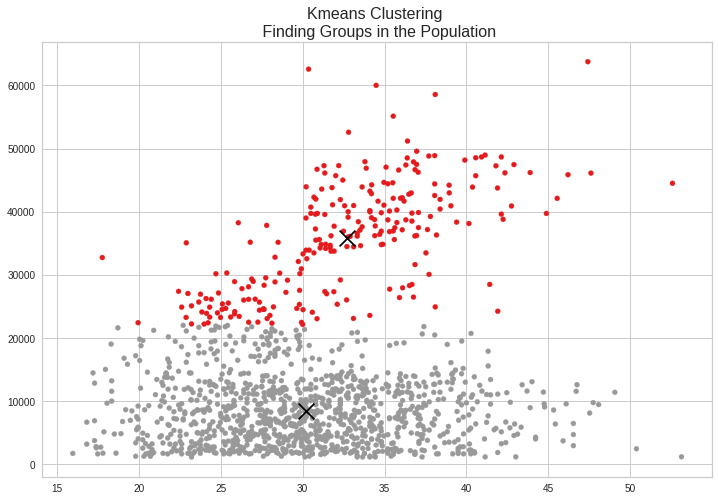

Silhouette score= 0.7335587359346507


In [65]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(X)

print(kmeans.cluster_centers_)
print(kmeans.labels_)

fig = plt.figure(figsize=(12,8))
plt.scatter(X.values[:,0], X.values[:,1] , c=kmeans.labels_ , cmap="Set1_r", s=25)

plt.title("Kmeans Clustering \n Finding Groups in the Population", fontsize=16)

plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.show()
from sklearn import metrics

m= metrics.silhouette_score(X, kmeans.labels_,  metric='euclidean')
print("Silhouette score=",m) 


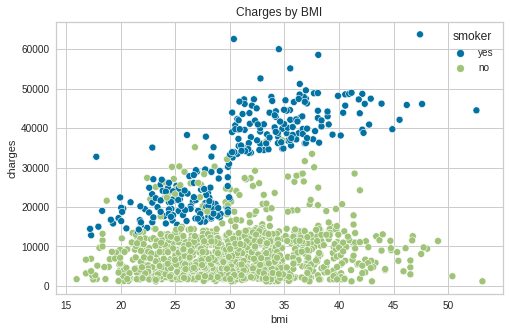

In [53]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=Ins_df, x="bmi", y="charges", hue="smoker")
plt.title('Charges by BMI');
plt.show();

# Conclusion 
As we see that K-means clustering gives us the distinctive cluster of smokers vs. non-smokers data which means that after Bmi, the smokers data was a determining factor.


---



---



# *** Agglomerative Clustering ***
In this method, if more distinction between the cluster can be viewed visually. 

In [68]:
from sklearn.cluster import AgglomerativeClustering
X_full = Ins_df1[["bmi", "charges"]]
X = X_full.sample(frac=0.4)
agglomerative_clustering = AgglomerativeClustering(n_clusters=3).fit(X)
print(agglomerative_clustering)
print(agglomerative_clustering.labels_)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)
[1 0 1 0 0 1 0 1 0 2 0 0 0 0 0 0 0 0 2 0 1 2 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 2 0 2 0 0 0 0 0 0 0 1 0 0 0 1 2 0 0 2 0 0 0 0 0 1 2 0 0 0 0 2 0 2 0
 1 0 0 0 0 0 2 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 2 1 0 0 1 0
 0 0 2 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 0 1 0 0 0 0 2 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 1 0 2 0 0 0 0 2 0 0 2 0 0 0 0 2 1 0
 0 2 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 2 0 0 1 0 0 2 0 0
 0 0 2 2 2 0 0 0 1 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 1 0 0 0 0 0 0 0 2 0 2 1 0
 0 0 1 0 0 0 2 0 0 0 0 0 1 1 2 0 0 0 0 0 0 0 0 0 1 0 2 0 0 2 2 0 2 0 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 2 0 2 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 1 0 0 2 0 0 0 2 0 0 0 0 1 0 0 1 0 0 2 1 0 

# **Single Linkage**

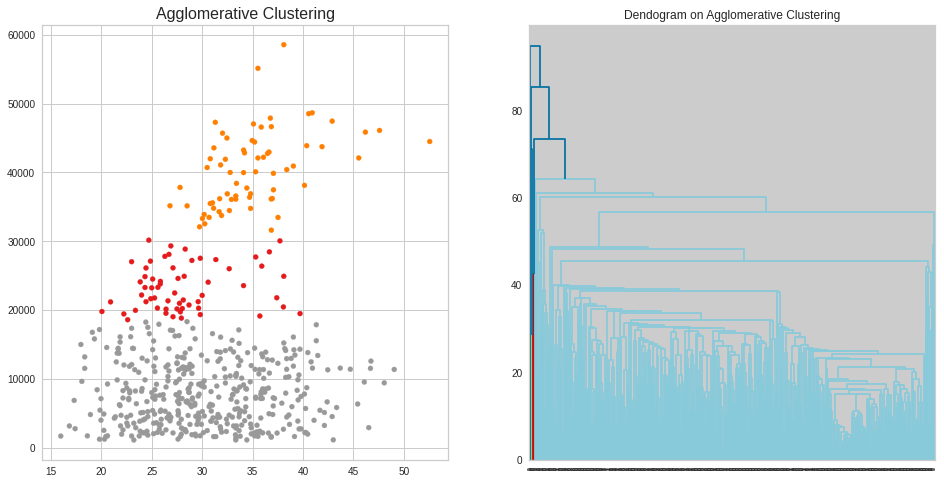

Silhouette score= 0.6207603732525913


In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,8))

linked = linkage(agglomerative_clustering.children_, 'single')

ax1.scatter(X.values[:,0], X.values[:,1], c=agglomerative_clustering.labels_, cmap="Set1_r", s=25)
ax1.set_title("Agglomerative Clustering", fontsize=16)

dendrogram(linked,orientation='top', labels=agglomerative_clustering.labels_, distance_sort='descending', show_leaf_counts=False, ax=ax2)
ax2.set_title("Dendogram on Agglomerative Clustering")

plt.show()

m= metrics.silhouette_score(X, agglomerative_clustering.labels_,  metric='euclidean')
print("Silhouette score=",m) 


# **Dataset Acknowledgement:**
This data set has been sourced from the Repository of Machine Learning with R datasets. 
The URL page mentions the following as the original source of the data set: 

Stedy, stedy/Machine-Learning-with-R-datasets, GitHub. (2015). https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv (accessed June 18, 2021). 